### Part B ###

In [1]:
import sqlite3

Problem i:

In [ ]:
import os
if (os.path.exists('myfltdata.db')):
    os.remove('myfltdata.db')

In [3]:
db1=sqlite3.connect('myfltdata.db')

In [4]:
cursor = db1.cursor()

Problem ii:

In [5]:
sql = 'DROP TABLE IF EXISTS flights;'

cursor.execute(sql)

In [6]:
sql = '''CREATE TABLE flights (
         year INTEGER NOT NULL,
         month INTEGER NOT NULL,
         day INTEGER NOT NULL,
         dep_time INTEGER,
         sched_dep_time INTEGER,
         dep_delay INTEGER,
         arr_time INTEGER,
         sched_arr_time INTEGER,
         arr_delay INTEGER,
         carrier CHAR(2) NOT NULL,
         flight INTEGER NOT NULL,
         tailnum TEXT,
         origin VARCHAR(10) NOT NULL,
         dest VARCHAR(10) NOT NULL,
         air_time INTEGER,
         distance INTEGER NOT NULL,
         hour INTEGER NOT NULL,
         minute INTEGER NOT NULL,
         time_hour TIMESTAMP NOT NULL,
         PRIMARY KEY (origin,year,month,day,hour,minute,flight,dest)
         );
         '''

cursor.execute(sql)

In [7]:
import pandas as pd

In [8]:
flights = pd.read_csv('flights.csv')
flights.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'time_hour'],
      dtype='object')

In [9]:
del flights['Unnamed: 0']
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [10]:
pd.io.sql.to_sql(flights,"flights",db1, flavor='sqlite', if_exists='append',index=False)

D:\Anaconda\lib\site-packages\pandas\io\sql.py:527: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)


In [11]:
sql = 'DROP TABLE IF EXISTS weather;'

In [12]:
cursor.execute(sql)

In [13]:
sql = '''CREATE TABLE weather (
         origin VARCHAR(10) NOT NULL,
         year INTEGER NOT NULL,
         month INTEGER NOT NULL,
         day INTEGER NOT NULL,
         hour INTEGER NOT NULL,
         temp FLOAT,
         dewp FLOAT,
         humid FLOAT,
         wind_dir FLOAT,
         wind_speed FLOAT,
         wind_gust FLOAT,
         precip INTEGER,
         pressure DECIMAL(10,2),
         visib FLOAT,
         time_hour TIMESTAMP NOT NULL,
         PRIMARY KEY (origin,year,month,day,hour),
         FOREIGN KEY (origin,year,month,day,hour)
         REFERENCES flights (origin,year,month,day,hour)
         );
         '''

In [14]:
cursor.execute(sql)

In [15]:
weather = pd.read_csv('weather.csv')
weather.columns

Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib', 'time_hour'],
      dtype='object')

In [16]:
del weather['Unnamed: 0']
weather.columns

Index(['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour'],
      dtype='object')

In [17]:
pd.io.sql.to_sql(weather,"weather",db1, flavor='sqlite', if_exists='append',index=False)

D:\Anaconda\lib\site-packages\pandas\io\sql.py:527: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)


Problem iii:

In [18]:
sql = '''
      SELECT * FROM flights AS A 
      LEFT JOIN weather AS B 
      ON A.year = B.year AND 
      A.month = B.month AND 
      A.day = B.day AND
      A.hour = B.hour AND
      A.origin = B.origin; 
      '''

In [19]:
fwdata = pd.read_sql(sql,db1)

In [20]:
fwdata

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,26.06,57.33,260.0,13.80936,15.891535,0.0,1011.9,10.0,2013-01-01 01:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01 01:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,39.92,26.06,57.33,260.0,13.80936,15.891535,0.0,1011.9,10.0,2013-01-01 01:00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 01:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,39.92,26.06,57.33,260.0,13.80936,15.891535,0.0,1011.9,10.0,2013-01-01 01:00:00


Problem iv:

In [21]:
sql = 'DROP TABLE IF EXISTS mydelay;'

cursor.execute(sql)

In [22]:
sql = '''CREATE TABLE mydelay (
         year INTEGER NOT NULL,
         month INTEGER NOT NULL,
         day INTEGER NOT NULL,
         dep_time INTEGER,
         sched_dep_time INTEGER,
         dep_delay INTEGER,
         arr_time INTEGER,
         sched_arr_time INTEGER,
         arr_delay INTEGER,
         carrier CHAR(2) NOT NULL,
         flight INTEGER NOT NULL,
         tailnum TEXT,
         origin VARCHAR(10) NOT NULL,
         dest VARCHAR(10) NOT NULL,
         air_time INTEGER,
         distance INTEGER NOT NULL,
         hour INTEGER NOT NULL,
         minute INTEGER NOT NULL,
         time_hour TIMESTAMP NOT NULL,
         PRIMARY KEY (origin,year,month,day,hour,minute,flight,dest)
         FOREIGN KEY (origin,year,month,day,hour,minute,flight,dest)
         REFERENCES flights (origin,year,month,day,hour,minute,flight,dest)
         );
         '''

cursor.execute(sql)

In [23]:
sql = '''
      INSERT INTO mydelay
      SELECT * FROM flights
      WHERE origin = 'JFK'
      AND dep_delay > 600;
      '''

In [24]:
cursor.execute(sql)

In [25]:
sql = '''
      SELECT *
      FROM mydelay
      '''

In [26]:
delaydata = pd.read_sql(sql,db1)

In [27]:
delaydata

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,848,1835,853,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
1,2013,1,9,641,900,1301,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00
2,2013,2,16,757,1930,747,1013.0,2149,744.0,9E,3798,N8940E,JFK,CLT,85.0,541,19,30,2013-02-16 19:00:00
3,2013,3,18,1020,2100,800,1336.0,32,784.0,DL,2363,N624AG,JFK,LAX,335.0,2475,21,0,2013-03-18 21:00:00
4,2013,4,10,1100,1900,960,1342.0,2211,931.0,DL,2391,N959DL,JFK,TPA,139.0,1005,19,0,2013-04-10 19:00:00
5,2013,4,19,617,1700,797,858.0,1955,783.0,AA,257,N3GJAA,JFK,LAS,313.0,2248,17,0,2013-04-19 17:00:00
6,2013,4,19,606,1725,761,923.0,2020,783.0,AA,1901,N3DGAA,JFK,IAH,222.0,1417,17,25,2013-04-19 17:00:00
7,2013,5,19,713,1700,853,1007.0,1955,852.0,AA,257,N3HEAA,JFK,LAS,323.0,2248,17,0,2013-05-19 17:00:00
8,2013,6,15,1432,1935,1137,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15 19:00:00
9,2013,6,27,615,1705,790,853.0,2004,769.0,DL,503,N372DA,JFK,SAN,312.0,2446,17,5,2013-06-27 17:00:00


Problem v:

In [28]:
sql = '''
      SELECT A.temp, A.humid, A.wind_speed,A.precip
      FROM weather AS A 
      JOIN mydelay AS B 
      ON A.year = B.year AND 
      A.month = B.month AND 
      A.day = B.day AND
      A.hour = B.hour AND
      A.origin = B.origin; 
      '''

In [29]:
wdata = pd.read_sql(sql,db1)

In [35]:
wdata

,temp,humid,wind_speed,precip
0,37.40,64.70,14.96014,0.00
1,35.06,92.40,0.00000,0.00
2,39.02,48.07,12.65858,0.00
3,33.80,74.63,16.11092,0.01
4,60.08,59.72,17.26170,0.00
5,59.00,87.83,23.01560,0.00
6,59.00,87.83,23.01560,0.00
7,57.20,93.69,14.96014,0.03
8,78.08,37.38,10.35702,0.00
9,80.06,74.07,11.50780,0.00


In [34]:
wdata.mean()

temp          57.370000
humid         69.372222
wind_speed    13.233970
precip         0.002222
dtype: float64

Problem vi:

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

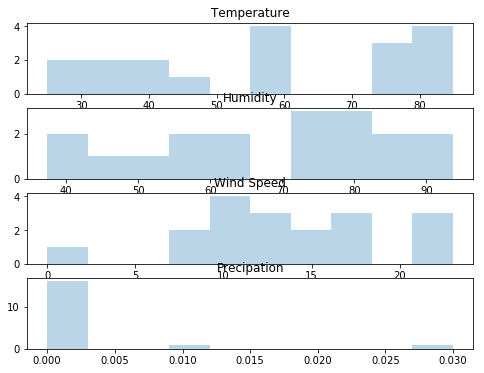

In [32]:
plt.clf
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(4,1,1)
ax1.set_title('Temperature')
ax1.hist(wdata.temp,bins=10,alpha=0.3)
ax2=fig.add_subplot(4,1,2)
ax2.set_title('Humidity')
ax2.hist(wdata.humid,bins=10,alpha=0.3)
ax3=fig.add_subplot(4,1,3)
ax3.set_title('Wind Speed')
ax3.hist(wdata.wind_speed,bins=10,alpha=0.3)
ax4=fig.add_subplot(4,1,4)
ax4.set_title('Precipation')
ax4.hist(wdata.precip,bins=10,alpha=0.3)
plt.show()

Problem vii:

In [33]:
delaydata.to_csv('mydelay.csv', encoding='utf-8')

In [34]:
db1.commit()
cursor.close()